In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn as skl
import pickle as pkl
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, MinMaxScaler


In [2]:
data = pkl.load(open('../dataset.pkl', 'rb'))

In [3]:
clusterer = TSNE()
scaler = StandardScaler()
protein_2d = clusterer.fit_transform(data['ProteinFeatures'])
drug_2d = clusterer.fit_transform(data['DrugFeatures'])
protein_2d = scaler.fit_transform(protein_2d)
drug_2d = scaler.fit_transform(drug_2d)

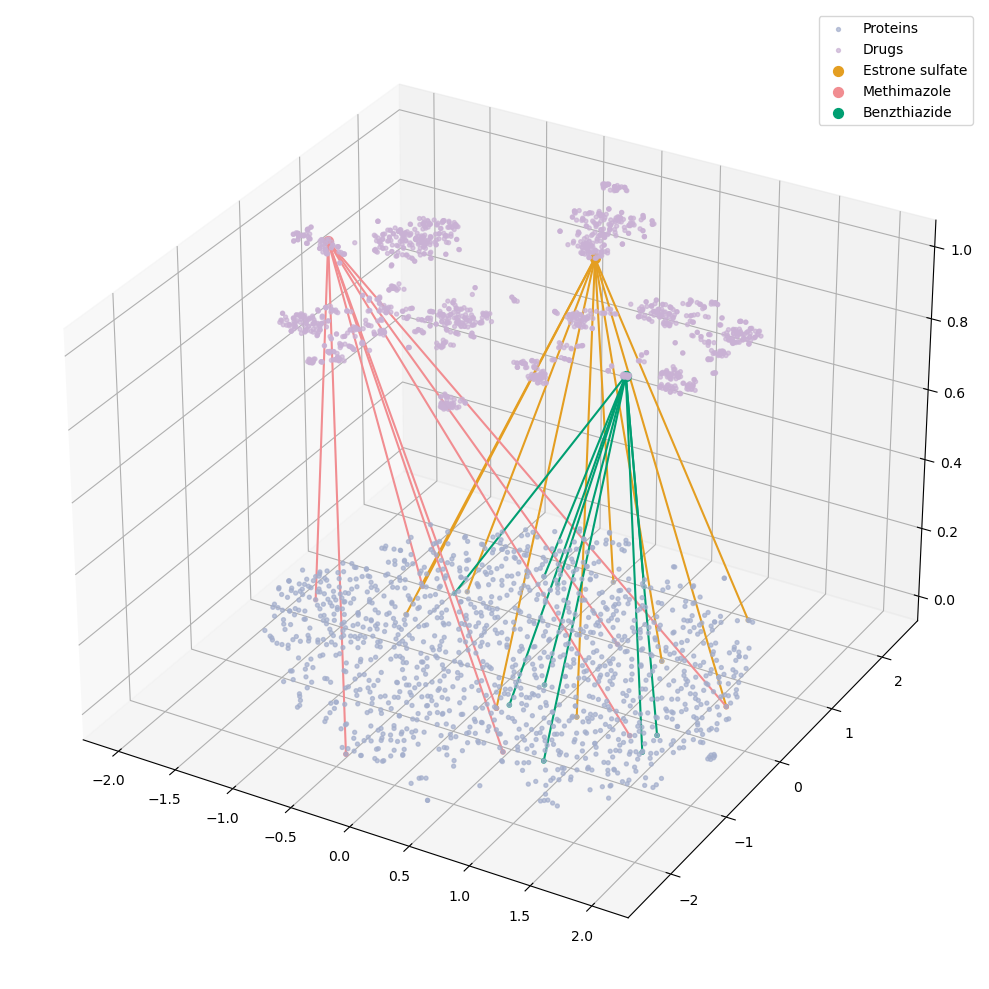

In [4]:
drugs_id = ['DB04574', 'DB00763', 'DB00562']
# drugs_id = ['DB00835', 'DB00351', 'DB00763']
drugs_loc = list(map(data['Drugs'].index.get_loc, drugs_id))
drugs_colors = ['#E49E21', '#F18D91', '#009F72', '#A3AECC', '#C9B1D4']
protein_color = '#A3AECC'
drugs_color = '#C9B1D4'

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')

z = np.array([1,0])

ax.scatter(protein_2d[:, 0], protein_2d[:, 1], z[1], color=protein_color, alpha=0.7, s=8, label='Proteins', zorder=1)
ax.scatter(drug_2d[:, 0], drug_2d[:, 1], z[0], color=drugs_color, alpha=0.7, s=8, label='Drugs', zorder=2)

for drug_id, drug_loc, drug_color in zip(drugs_id, drugs_loc, drugs_colors):
    drug_pos = drug_2d[drug_loc].reshape((1, -1))
    drug_name = data['Drugs'].loc[drug_id, 'Drug_name']
    corresponding_DTI = data['DTI'][data['DTI']['Drug_ID']==drug_id]
    corresponding_protein_locs = [data['Proteins'].index.get_loc(Protein_ID) for Protein_ID in data['Proteins'].loc[corresponding_DTI['Protein_ID']].index]
    dti_edges = np.stack((np.repeat(drug_pos, len(corresponding_protein_locs), axis=0), protein_2d[corresponding_protein_locs]), axis=0)
    for i in range(dti_edges.shape[1]):
        ax.plot3D(dti_edges[:, i, 0], dti_edges[:, i, 1], z, c=drug_color, zorder=0)

    ax.scatter(protein_2d[corresponding_protein_locs, 0], protein_2d[corresponding_protein_locs, 1], z[1], c=drug_color, s=9, zorder=3)
    ax.scatter(drug_pos[:, 0], drug_pos[:, 1], z[0], c=drug_color, s=50, label=drug_name, zorder=4)


ax.legend()

# ax.set_xticks([])
# ax.set_yticks([])
# ax.set_zticks([])


# ax.view_init(elev=10, azim=40)
# ax.set_zlim(-1, 2)
plt.tight_layout()
plt.savefig('../images/drug_protein.png', dpi=300,  bbox_inches='tight')